#2. EDA방식으로 접근
## 2-1) 데이터 수집


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install --upgrade numpy pandas matplotlib seaborn scipy

     |████████████████████████████████| 11.2 MB 4.0 MB/s 
     |████████████████████████████████| 38.1 MB 1.5 MB/s 
     |████████████████████████████████| 895 kB 50.2 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
df = pd.read_csv('/content/10min.csv')

In [ ]:
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [ ]:
print(len(df))

9879


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [ ]:
# 결측치 유무
df.isnull().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

## 2-2) EDA 시각화를 통한 탐색

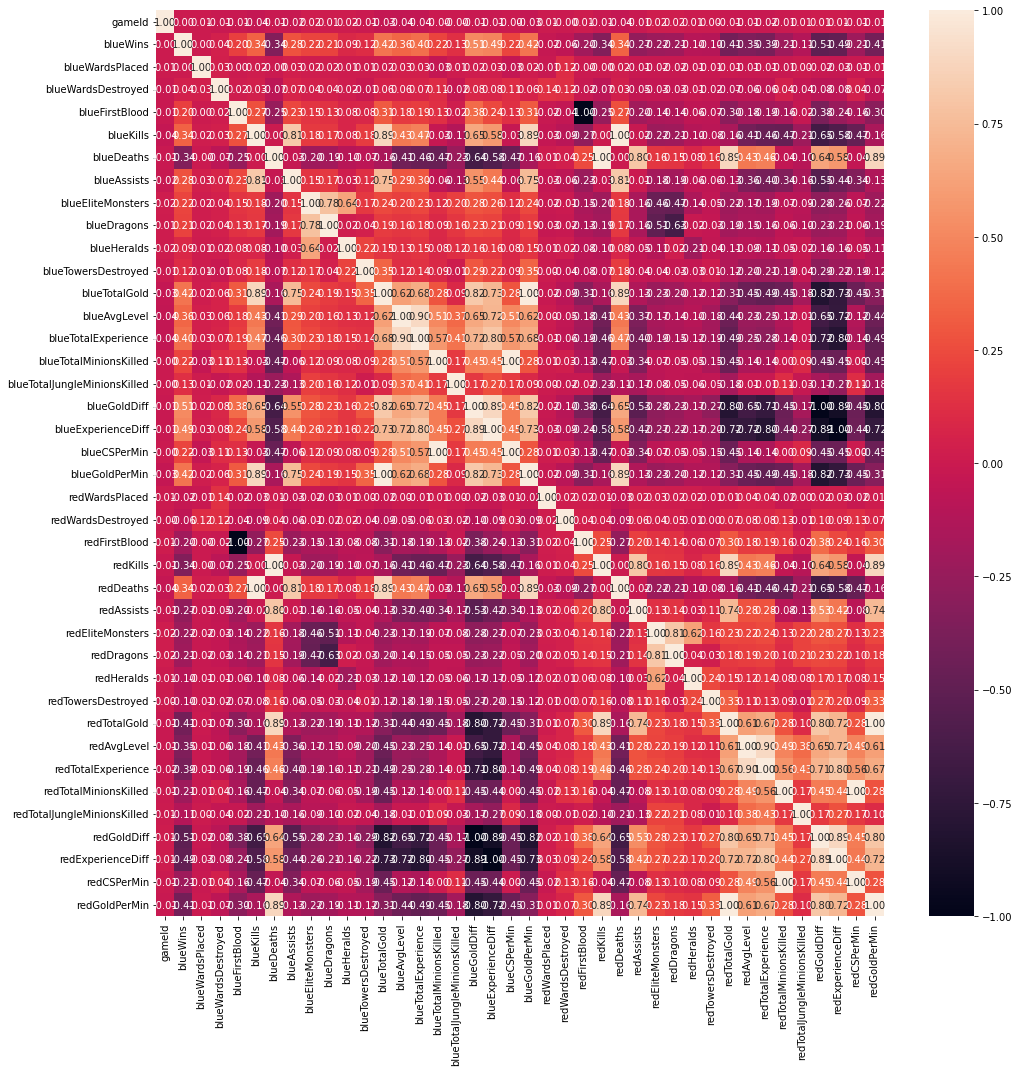

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(),annot=True, fmt='.2f')
plt.tight_layout()

## Feature들 중에 쓸만한 것과 거를것들을 선정해보자.

### 0) gameid의 경우 특별한 역할이 없으므로 삭제(index로 대체)

### 1) 블루팀/레드팀으로 나뉘어있어 무의미한 것들이 많이 있다

bluedeath와 redkill, bluekill과 reddeath, bluefirstblood와 redfirstblood는 완전 같은 Feature
히트맵을 확인하면 상관계수가 1이므로 삭제해도 무방하다는 것을 알 수 있다.

또한 '블루가 승리 = 레드는 패배'라는 가정에 의해 대부분의 레드
관련 정보는 삭제해도 무방


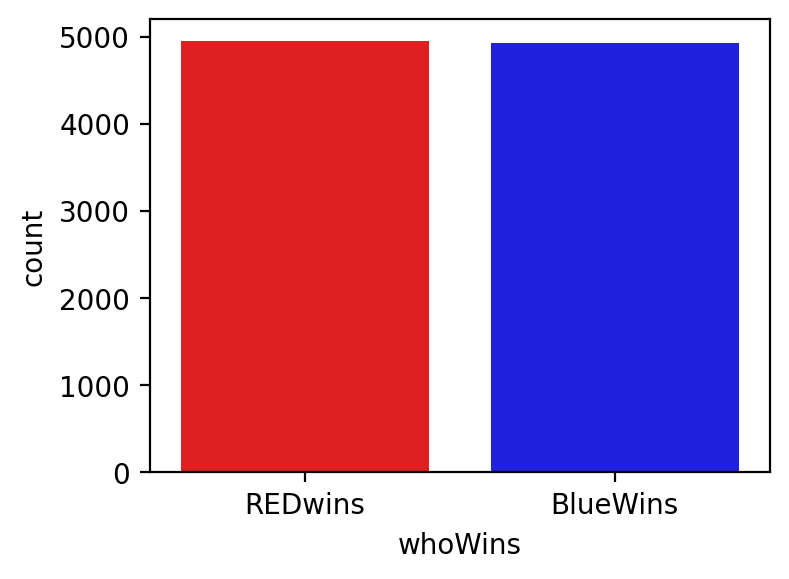

In [ ]:
df['whoWins'] = df.blueWins.map({0:"REDwins", 1:"BlueWins"})
palette = ['RED','BLUE']
plt.figure(figsize=(4,3),dpi=200)
sns.countplot(data=df, x='whoWins', palette=palette)
plt.show()

#### 승률차가 없다.

일부러 그렇게 표집했을 가능성도 있다고 생각함


### 2) 합 등 수식으로 요약할 수 있는 feature

미니언 킬, 정글 킬 등의 정보는 total gold의 factor이고, 단순 total gold보다 양팀의 gold diff가 더 직관적이므로 하나로 요약

마찬가지로 blueAvgLevel, blueTotalexp등도 blueexpdiff로 요약 가능

Elitemonster는 단순 Dragon + Heralds의 합이므로 삭제 가능

### 3) 상관관계가 낮은 feature에 대한 삭제

WardsPlaced 및 WardsDestroyed의 경우 상관관계가 낮긴하지만
Wardsplaced는 아래 가정에 의해 다른 전처리 과정을 거쳐서
확인을 해보려고 한다.



<AxesSubplot:>

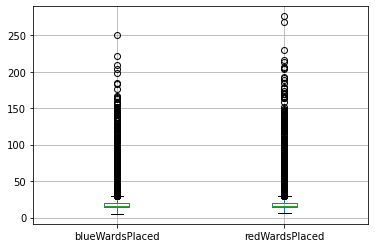

In [ ]:
df.boxplot(['blueWardsPlaced', 'redWardsPlaced'])

#### 와드개수와 관련된 변수
한 눈에봐도 제대로된 편차를 알 수 없다.

서렌 혹은 트롤시 집앞에 와드꽃을 만들기 때문으로 보임

#### 특이치 확인 및 삭제

In [ ]:
a = np.mean(blueward.blueWardsPlaced)
b = np.std(blueward.blueWardsPlaced)
print(f'블루팀 와드 평균 : {a:.2f}, 블루팀 와드 편차 : {b:.2f}')

블루팀 와드 평균 : 22.29, 블루팀 와드 편차 : 18.02


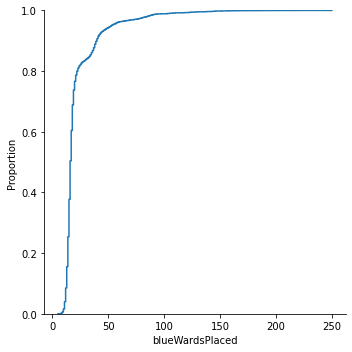

In [ ]:
# 특이치 확인
blue_no_outliers = df.copy()

sns.displot(blue_no_outliers['blueWardsPlaced'],kind="ecdf")
plt.show()

In [ ]:
blue_no_outliers = blue_no_outliers.loc[blue_no_outliers['blueWardsPlaced']
                                        <= np.quantile(blue_no_outliers['blueWardsPlaced']
                                                      ,q=0.99)]
print('삭제 {}'.format(df.shape[0]-blue_no_outliers.shape[0]))

삭제 93


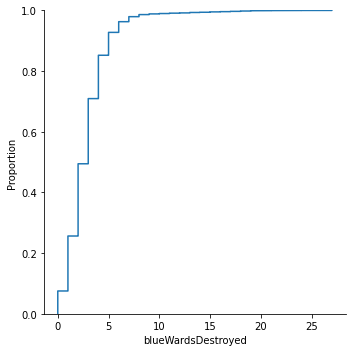

In [ ]:
sns.displot(blue_no_outliers['blueWardsDestroyed'],kind='ecdf')

In [ ]:
blue_no_outliers = blue_no_outliers.loc[blue_no_outliers['blueWardsDestroyed'] 
                                        <= np.quantile(blue_no_outliers['blueWardsDestroyed']
                                                       ,q=0.99)]
print('삭제 {}'.format(df.shape[0]-blue_no_outliers.shape[0]))

삭제 182


In [ ]:
blueward.describe()

,blueWardsPlaced,blueWins,redWardsPlaced
count,9879.000000,9879.000000,9879.000000
mean,22.288288,0.499038,22.367952
std,18.019177,0.500024,18.457427
min,5.000000,0.000000,6.000000
25%,14.000000,0.000000,14.000000
50%,16.000000,0.000000,16.000000
75%,20.000000,1.000000,20.000000
max,250.000000,1.000000,276.000000


#### 블루와드의 평균, 레드와드의 평균이 거의 같다.
따라서 와드의 수는 승패에 전혀 영향을 미치지 않는 다는 것을 알 수 있다. 

이는 초기 10분 내의 시야정보가 크게 중요하지 않기 때문이며,
상위권 티어에서는 상황이 되면 다들 적절하게 와드를 사용하기 때문에 이로인한 편차가 거의 없는 점으로 해석 할 수 있다.

### 4) kill, death, assists에 관한 feature

롤에서 킬, 데스, 어시는 다양한 지표로 사용한다. 때문에 이 지표들을 단순히 확인하지 않고 적절하게 수식으로 변환해서 더 영향을 주는 하나의 feature로 요약하고자 한다.

In [ ]:
kda.corr()

,blueWins,blueKills,blueDeaths,KD,blueAssists,KAD,KDA.1,KAD2
blueWins,1.000000,0.337358,-0.339297,0.479379,0.276685,0.454906,0.356967,0.424118
blueKills,0.337358,1.000000,0.004044,0.714854,0.813667,0.822438,0.463757,0.852929
blueDeaths,-0.339297,0.004044,1.000000,-0.696377,-0.026372,-0.525914,-0.576934,-0.409648
KD,0.479379,0.714854,-0.696377,1.000000,0.602396,0.958009,0.736267,0.898590
blueAssists,0.276685,0.813667,-0.026372,0.602396,1.000000,0.805973,0.501433,0.891547
KAD,0.454906,0.822438,-0.525914,0.958009,0.805973,1.000000,0.726154,0.986675
KDA.1,0.356967,0.463757,-0.576934,0.736267,0.501433,0.726154,1.000000,0.693436
KAD2,0.424118,0.852929,-0.409648,0.898590,0.891547,0.986675,0.693436,1.000000


### KDA 관련 지표
#### 4-1) 단순 킬데스로 본 K-D (KD)
#### 4-2) 흔히 사용되는 KDA(K+A)/D (KDA)
#### 4-3) 골드차이에 가까운 K+0.5A-D (KAD.1)
#### 4-4) 킬어시합과 데스의 차 K+A-D (KAD2)

상관계수는 KD가 제일 높았으나 Assist정보와
보편적으로 사용되는 것을 감안해

KDA를 kill, death, assist의 요약 feature로 사용함

KDA에서 D가 0인 경우는 10으로 일괄 변경하였다.


In [ ]:
EDA = pd.read_csv('/content/EDA.csv')
#파이썬 능력부족으로 엑셀로 EDA진행
# # 블루 사이드 관련 컬럼으로만 데이터 만들어놓기
# blue_side_columns=[]
# for col in df:
#   if 'blue' in col:
#     blue_side_columns.append(col)

# blue_data = df[blue_side_columns]
# blue_data.head()

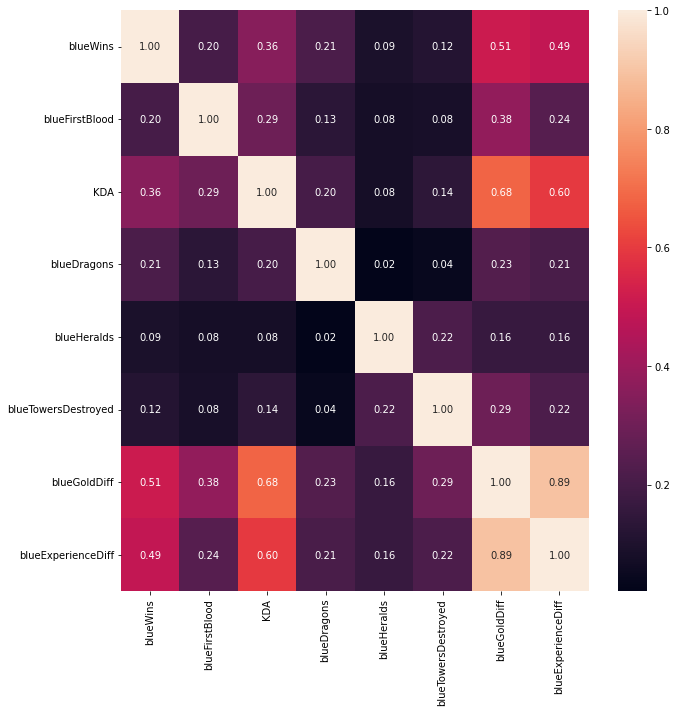

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data = EDA.corr(),annot=True, fmt='.2f')
plt.tight_layout()

In [ ]:
blue_data_scaled = blue_no_outliers.copy()

blue_target = blue_no_outliers['blueWins'] #target
blue_features = blue_no_outliers.drop(['blueWins'],axis=1) # features

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

using_cols = EDA.columns[1:]

X = EDA[using_cols]# columns
y = EDA['blueWins'] # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# Decision Tree  모델 학습
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=2,
                             max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7273954116059379


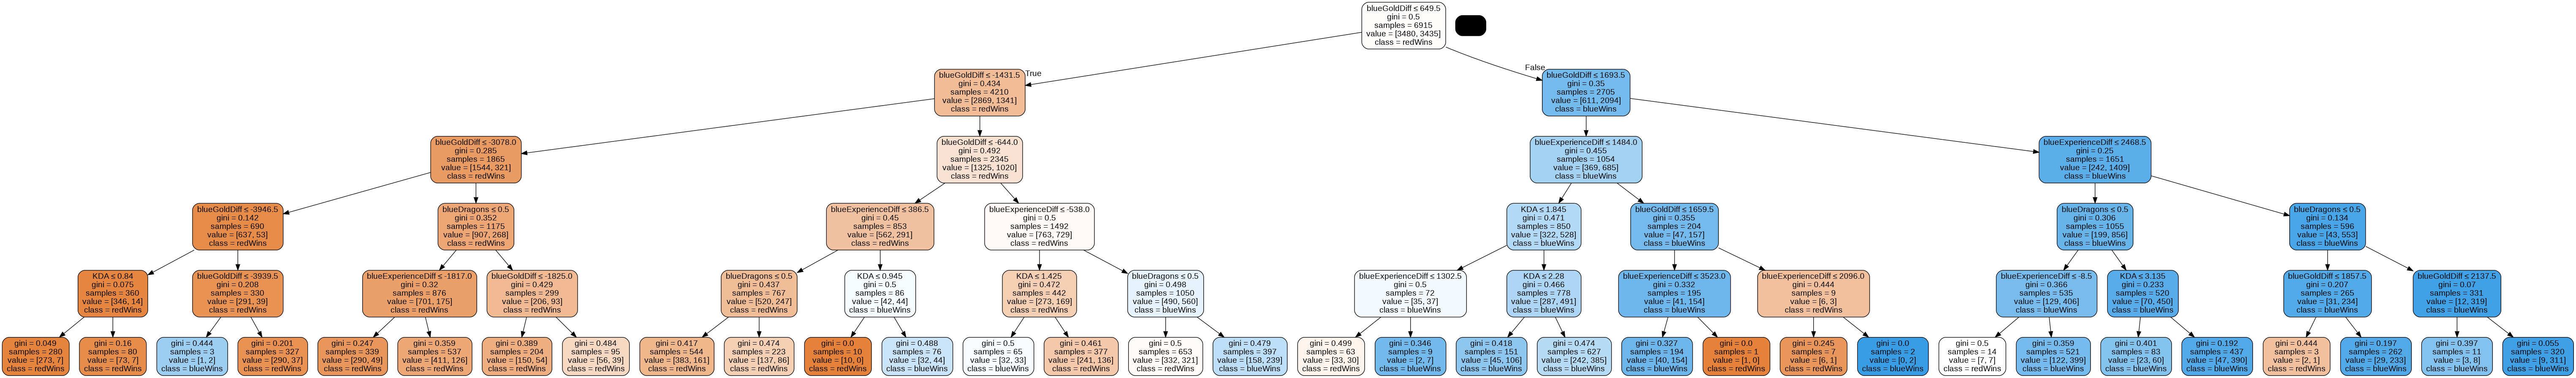

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True, 
                feature_names=using_cols, 
                class_names=['redWins','blueWins']
               )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('row_df.png')
Image(graph.create_png(), retina=True)

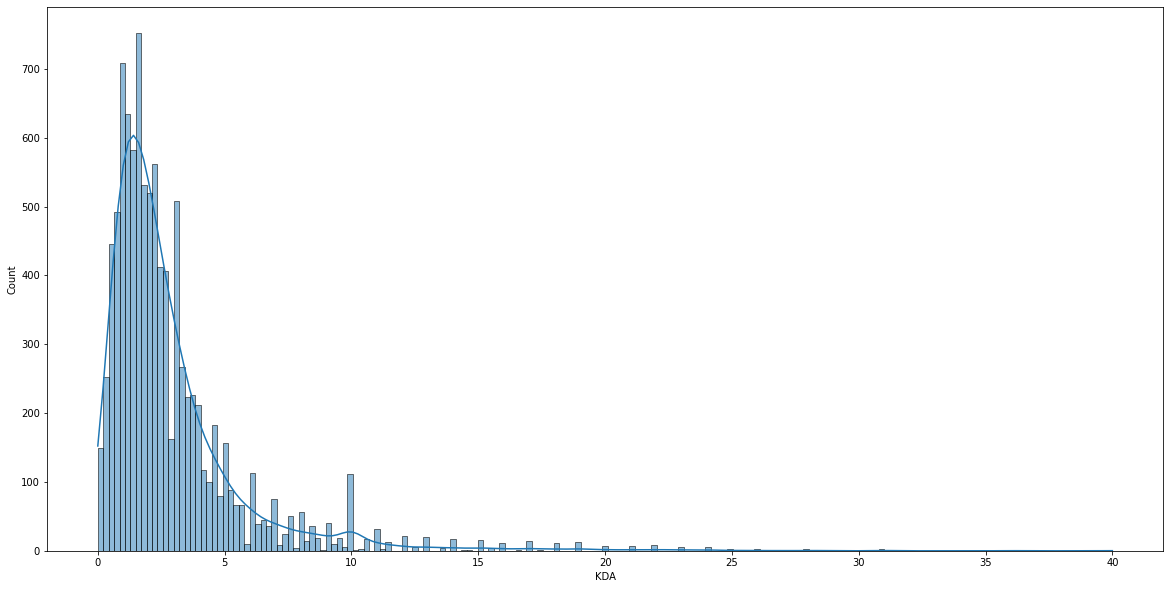

In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(EDA['KDA'], kde=True)
plt.show()

<AxesSubplot:xlabel='KDA', ylabel='blueWins'>

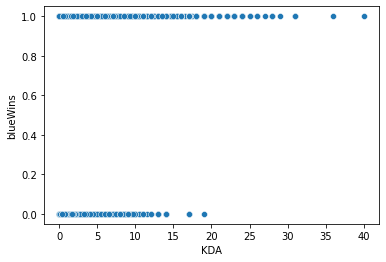

In [ ]:
sns.scatterplot(x='KDA', y='blueWins', data=EDA)

In [ ]:
kdawin=EDA[['KDA','blueWins']]

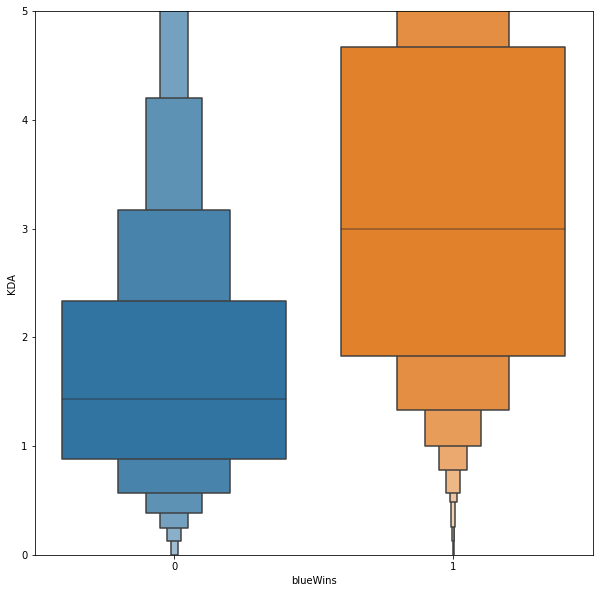

In [ ]:
plt.figure(figsize=(10,10))
sns.boxenplot(x='blueWins', y='KDA', data=kdawin)
plt.ylim([0, 5])
plt.show()

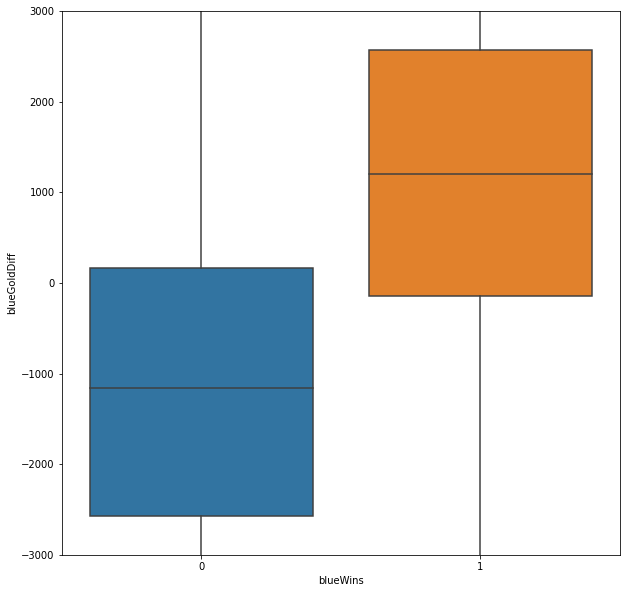

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x='blueWins', y='blueGoldDiff', data=EDA)
plt.ylim([-3000, 3000])
plt.show()

In [ ]:
EDA.columns

Index(['blueWins', 'blueFirstBlood', 'KDA', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueGoldDiff', 'blueExperienceDiff'],
      dtype='object')

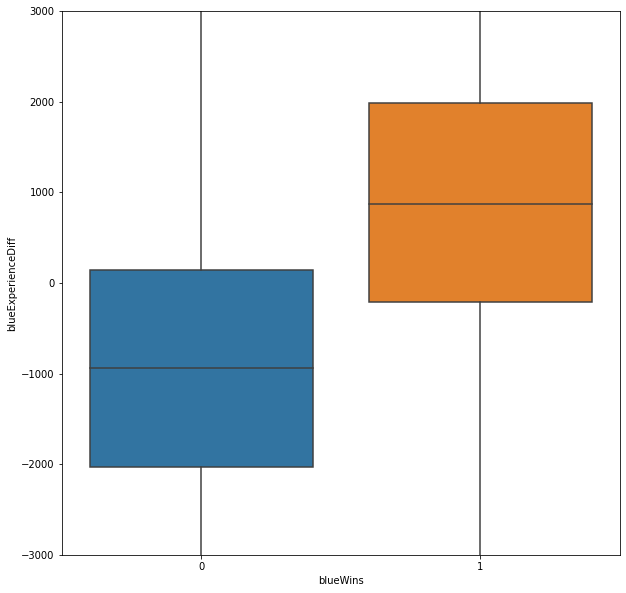

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x='blueWins', y='blueExperienceDiff', data=EDA)
plt.ylim([-3000, 3000])
plt.show()

In [ ]:
EDA['blueWins'].value_counts()

0    4949
1    4930
Name: blueWins, dtype: int64

In [ ]:
fb = EDA.loc[EDA.blueFirstBlood == 0]

In [ ]:
fb.head()

,blueWins,blueFirstBlood,KDA,blueDragons,blueHeralds,blueTowersDestroyed,blueGoldDiff,blueExperienceDiff
1,0,0,2.00,0,0,0,-2908,-1173
2,0,0,1.00,1,0,0,-1172,-1033
3,0,0,1.80,0,1,0,-1321,-7
4,0,0,2.00,0,0,0,-1004,230
5,1,0,3.67,1,0,0,698,101


In [ ]:
fb['blueWins'].value_counts()

0    2949
1    1943
Name: blueWins, dtype: int64

In [ ]:
fb2 = EDA.loc[EDA.blueFirstBlood == 1]

In [ ]:
fb2['blueWins'].value_counts()

1    2987
0    2000
Name: blueWins, dtype: int64

In [ ]:
bluewinnfb = [1943, 2949]
bluewinfb = [2987, 2000]
colors = ['blue', 'red']
label = ['bluewin', 'redwin']

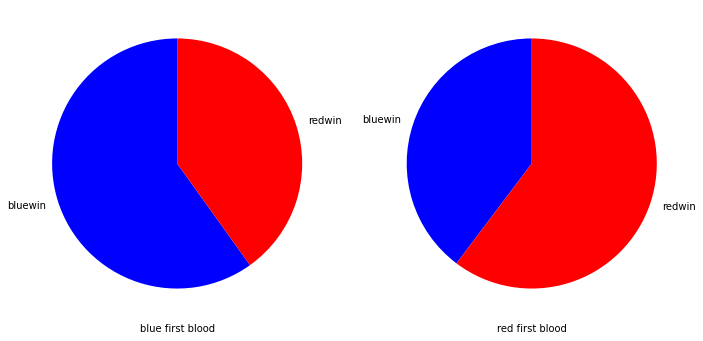

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(1,2,1)
plt.pie(bluewinfb, labels=label, startangle = 90, colors=colors)
plt.xlabel('blue first blood')

plt.subplot(1,2,2)
plt.pie(bluewinnfb, labels=label, startangle = 90, colors=colors)
plt.xlabel('red first blood')

plt.tight_layout()

In [ ]:
BDK = EDA.loc[EDA.blueDragons == 1]

In [ ]:
BDK['blueWins'].value_counts()

1    2292
0    1284
Name: blueWins, dtype: int64

In [ ]:
BDnK = EDA.loc[EDA.blueDragons == 0]

In [ ]:
BDnK['blueWins'].value_counts()

0    3665
1    2638
Name: blueWins, dtype: int64

In [ ]:
bluedragonkill = [2292, 1284]
bluedragonnotkill = [2638, 3665]

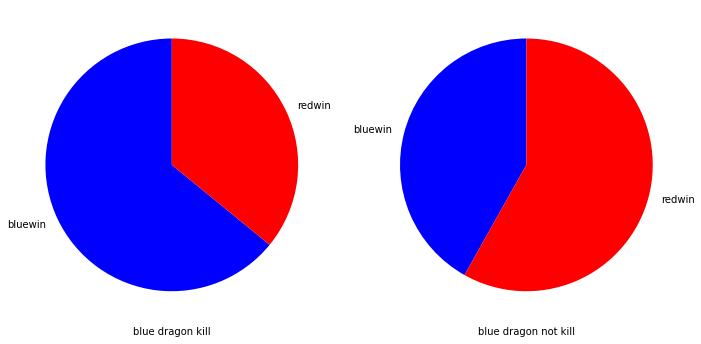

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(1,2,1)
plt.pie(bluedragonkill, labels=label, startangle = 90, colors=colors)
plt.xlabel('blue dragon kill')

plt.subplot(1,2,2)
plt.pie(bluedragonnotkill, labels=label, startangle = 90, colors=colors)
plt.xlabel('blue dragon not kill')

plt.tight_layout()

In [ ]:
BHK = EDA.loc[EDA.blueHeralds == 1]

In [ ]:
BHK['blueWins'].value_counts()

1    1105
0     752
Name: blueWins, dtype: int64

In [ ]:
BHnK = EDA.loc[EDA.blueHeralds == 0]

In [ ]:
BHnK['blueWins'].value_counts()

0    4197
1    3825
Name: blueWins, dtype: int64

In [ ]:
blueheraldkill = [1105, 752]
blueheraldnotkill = [3825, 4197]

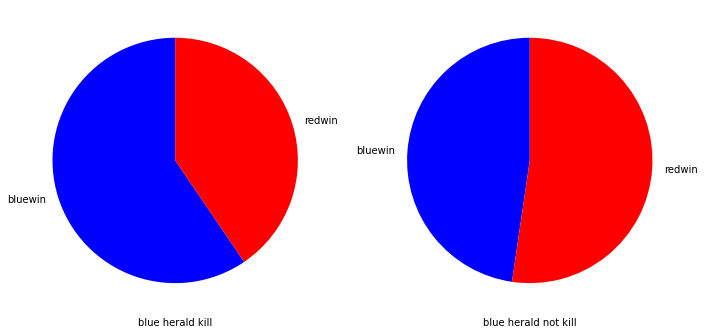

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(1,2,1)
plt.pie(blueheraldkill, labels=label, startangle = 90, colors=colors)
plt.xlabel('blue herald kill')

plt.subplot(1,2,2)
plt.pie(blueheraldnotkill, labels=label, startangle = 90, colors=colors)
plt.xlabel('blue herald not kill')

plt.tight_layout()

In [ ]:
BTD = EDA.loc[EDA.blueTowersDestroyed > 0]

In [ ]:
BTD['blueWins'].value_counts()

1    350
0    114
Name: blueWins, dtype: int64

In [ ]:
BTnD = EDA.loc[EDA.blueTowersDestroyed == 0]

In [ ]:
BTnD['blueWins'].value_counts()

0    4835
1    4580
Name: blueWins, dtype: int64

In [ ]:
bluetowerdest = [350, 114]
bluetowernotdest = [4580, 4835]

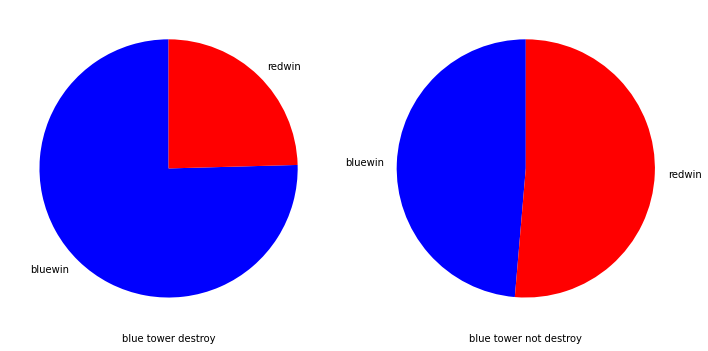

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(1,2,1)
plt.pie(bluetowerdest, labels=label, startangle = 90, colors=colors)
plt.xlabel('blue tower destroy')

plt.subplot(1,2,2)
plt.pie(bluetowernotdest, labels=label, startangle = 90, colors=colors)
plt.xlabel('blue tower not destroy')

plt.tight_layout()

## 2-3) 인사이트 도출
1. 평균 승리팀의 KDA는 3정도, 패배팀의 KDA는 1.5정도이며, 2.0~2.5정도면 승부가 박빙이라는 증거가 된다.
2. 골드차이가 500정도는 박빙 2000이상 차이나면 승기가 기울었다고 볼 수 있다.
3. 경험치 2000정도 차이 = 10분대 레벨을 고려하면 2~3렙 차이정도 나면 승기가 기울었다고 할 수 있다.
4. 퍼블을 먹은팀이 확실히 유리하다.
5. 드래곤을 먹으면 확실히 유리하지만, 못먹는다고 많이 불리해지는것은 아니다.
6. 전령은 확실히 이득을 주지만 못먹는다고 크게 손해보는 것은 아니다.
7. 10분안에 타워를 부순다면, 부순팀이 많이 유리해진다.

## 2-4) 회고

10분대 시간 데이터에 한정되고, 4년전 롤 메타가 완전 다를때라 분석에 어려움이 있었다.

또한 롤은 시간대별 데이터가 중요한데 시계열 데이터가 있다면 더 좋은 분석이 가능했을 꺼같다.

10분대 데이터만으로 승패가 충분히 예측가능할 정도의 Feature들이 많은 것으로 보아 당시 게임이 초반메타였다는 정보와 일치한다.

최근의 데이터, 라인과 관련된 정보, 챔피언 밴픽과 관련된 정보 등이 더 있었다면 좋았을꺼 같다.
